In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [2]:
# Set the device for training (e.g., 'cuda' or 'cpu')
device = torch.device('cuda')

In [3]:

class CustomDataset(Dataset):
    def __init__(self, data_path, transform=None):
        self.data_path = data_path
        self.transform = transform
        self.file_list = [file for file in os.listdir(data_path) if file.endswith('.npy')]

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        file_name = self.file_list[idx]
        file_path = os.path.join(self.data_path, file_name)
        data = np.load(file_path)
        
        if self.transform:
            data = self.transform(data)
        
        return data

In [4]:
from scipy.ndimage import rotate  

class ResizeNpyWithPadding:
    def __init__(self, output_size):
        self.output_size = output_size
    
    def __call__(self, data):
        h, w = data.shape
        
        new_h, new_w = self.output_size
        top = (new_h - h) // 2
        bottom = new_h - h - top
        left = (new_w - w) // 2
        right = new_w - w - left
        
        resized_data = np.pad(data, ((top, bottom), (left, right)), mode='constant')
        return resized_data

# Custom transformation: Random Horizontal Flip for npy data
class RandomHorizontalFlipNpy:
    def __call__(self, data):
        if np.random.random() < 0.5:
            flipped_data = np.fliplr(data)
            return flipped_data
        return data

class RandomRotationNpy:
    def __init__(self, degrees):
        self.degrees = degrees
        
    def __call__(self, data):
        angle = np.random.uniform(self.degrees[0], self.degrees[1])
        rotated_data = rotate(data, angle, reshape=False, mode='constant', cval=0.0)
        return rotated_data

In [10]:
import os
import numpy as np
from scipy.ndimage import rotate
import torch
from torchvision import transforms

import cv2
from torchvision import transforms

# Define the class for resizing with padding
class AddingPad:
    def __init__(self, output_size):
        self.output_size = output_size
    
    def __call__(self, data):
        h, w = data.shape
        
        new_h, new_w = self.output_size
        top = (new_h - h) // 2
        bottom = new_h - h - top
        left = (new_w - w) // 2
        right = new_w - w - left
        
        padded_data = np.pad(data, ((top, bottom), (left, right)), mode='constant')
        return padded_data
    


class ResizeNumpy:
    def __init__(self, output_size):
        self.output_size = output_size

    def __call__(self, np_array):
        h, w = np_array.shape[:2]
        new_h, new_w = self.output_size

        # Redimensionar o array NumPy usando a interpolação bilinear
        resized_array = cv2.resize(np_array, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

        return resized_array



# Define the class for random horizontal flipping
class RandomHorizontalFlipNpy:
    def __call__(self, data):
        if np.random.rand() < 0.5:
            data = np.fliplr(data)
        return data

# Define the class for random rotation
class RandomRotationNpy:
    def __init__(self, degrees):
        self.degrees = degrees
        
    def __call__(self, data):
        angle = np.random.uniform(self.degrees[0], self.degrees[1])
        rotated_data = rotate(data, angle, reshape=False, mode='constant', cval=0.0)
        return rotated_data

In [11]:
# Define the transformation
transform_npy = transforms.Compose([
    AddingPad((512,512)),
    ResizeNumpy((128, 128)),
    RandomHorizontalFlipNpy(),
    RandomRotationNpy(degrees=(-30, 30)),  # Random rotation between -15 and 15 degrees
    transforms.Lambda(lambda data: data.copy()),  # Copy the data to avoid grad error
    transforms.ToTensor(),
    transforms.Normalize(mean=[130.10511327778235], std=[316.09062860899644])
])



In [12]:
data_path = os.path.join('D:/dados_tcc/train')


lista_de_arquivos = [file for file in os.listdir(data_path) if file.endswith('.npy')]


tranform_example = transform_npy(np.load(os.path.join(data_path, lista_de_arquivos[2])))


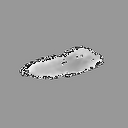

In [13]:
import numpy as np
from PIL import Image

# Convert the tensor to a NumPy array for plotting
image_to_plot = tranform_example.numpy()
image_to_plot = image_to_plot.squeeze()  # Remove the channel dimension

# Normalize the array to the range [0, 255] if needed
image_to_plot = (image_to_plot * 255).astype(np.uint8)

# Convert the NumPy array to a PIL Image
pil_image = Image.fromarray(image_to_plot, mode='L')  # 'L' mode for grayscale

pil_image

array([[[-0.41160699, -0.41160699, -0.41160699, ..., -0.41160699,
         -0.41160699, -0.41160699],
        [-0.41160699, -0.41160699, -0.41160699, ..., -0.41160699,
         -0.41160699, -0.41160699],
        [-0.41160699, -0.41160699, -0.41160699, ..., -0.41160699,
         -0.41160699, -0.41160699],
        ...,
        [-0.41160699, -0.41160699, -0.41160699, ..., -0.41160699,
         -0.41160699, -0.41160699],
        [-0.41160699, -0.41160699, -0.41160699, ..., -0.41160699,
         -0.41160699, -0.41160699],
        [-0.41160699, -0.41160699, -0.41160699, ..., -0.41160699,
         -0.41160699, -0.41160699]]])